In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15,9
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('sensity_events.csv')

In [3]:
df.head()

uuid       asset_id  \
0  SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1  SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2  SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
3  SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
4  SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   

                start_time                    end_time session_type  \
0  2018-08-10 23:33:26.081    2018-08-10 23:33:55.9371          car   
1  2018-08-10 23:34:58.454  2018-08-10 23:36:08.256733          car   
2  2018-08-10 23:33:40.424  2018-08-10 23:36:25.890125          car   
3  2018-08-10 23:34:44.149  2018-08-10 23:38:53.829785          car   
4  2018-08-10 23:37:38.946  2018-08-10 23:39:01.415632          car   

    latitude  longitude                                           geometry  
0  39.109786 -94.583482  {"type":"Polygon","coordinates":[[[-94.5834598...  
1  39.109536 -94.580771  {"type":"Polygon","coordinates":[[[-94.5807547...  
2  39.094360 -94.583396  {"type":"Polygon","coordinates":[[[-94.5834062...  
3  39.095302 -94.583515  {"type":"Polygon","coordinates":[[[-94.5835249...  
4  39.092984 -94.583621  {"type":"Polygon","coordinates":[[[-94.5836287...

In [4]:
df.shape

(162124, 8)

In [5]:
df.dropna(axis=0,how='any',inplace=True)
df.drop(columns='geometry',inplace=True)
df.drop(columns='session_type',inplace=True)

In [6]:
df.shape

(103943, 6)

In [7]:
df.rename(columns={'start_time':'start_date','end_time':'end_date'},inplace=True)

In [8]:
df.dtypes

uuid           object
asset_id       object
start_date     object
end_date       object
latitude      float64
longitude     float64
dtype: object

In [9]:
df['start_date'] = pd.to_datetime(df.start_date,format='%Y/%m/%d')
df['end_date'] = pd.to_datetime(df.end_date,format='%Y/%m/%d')

In [10]:
df.dtypes

uuid                  object
asset_id              object
start_date    datetime64[ns]
end_date      datetime64[ns]
latitude             float64
longitude            float64
dtype: object

In [11]:
df['start_from_fc']= df.start_date.dt.floor('5min')
df['end_from_fc'] = df.end_date.dt.ceil('5min')

In [12]:
df.isnull().sum()

uuid             0
asset_id         0
start_date       0
end_date         0
latitude         0
longitude        0
start_from_fc    0
end_from_fc      0
dtype: int64

In [13]:
df.dtypes

uuid                     object
asset_id                 object
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude                float64
longitude               float64
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
dtype: object

In [14]:
n = (df.end_from_fc - df.start_from_fc)
n,(n.dt.total_seconds())/60
df['diff'] = (n.dt.total_seconds())/60

In [15]:
df.head(50)

uuid       asset_id  \
0   SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1   SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2   SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
3   SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
4   SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   
5   SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...  SENSITY-kc-14   
6   SENSITY-kc-18-B6079A6A-B9EF-4080-B4D8-B2BA7099...  SENSITY-kc-18   
7   SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
8   SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A37...  SENSITY-kc-12   
9   SENSITY-kc-21-8A06DAEC-A8E9-4996-8723-51570636...  SENSITY-kc-21   
10  SENSITY-kc-21-4A7750BE-5AA9-492D-B913-04ED44E5...  SENSITY-kc-21   
11  SENSITY-kc-8-A0436C6D-91A9-452B-8561-A1F44BF0C381   SENSITY-kc-8   
12  SENSITY-kc-9-04B89F44-D078-4E0D-8395-648BF0D779BB   SENSITY-kc-9   
13  SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1F...  SENSITY-kc-10   
14  SENSITY-kc-8-936405B7-7462-46FD-B10E-09D22F407139   SENSITY-kc-8   
15  SENSITY-kc-8-1FE9FA74-7FC8-4721-BFD9-17A05014900E   SENSITY-kc-8   
16  SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09...  SENSITY-kc-12   
17  SENSITY-kc-14-7B69BC78-1676-4132-A4DB-A0C4874B...  SENSITY-kc-14   
18  SENSITY-kc-12-1A22267D-E0F1-4CBF-99B7-AE3AFA38...  SENSITY-kc-12   
19  SENSITY-kc-14-49219653-B436-4ECF-87B2-CEDE9349...  SENSITY-kc-14   
20  SENSITY-kc-2-8FABCBD4-9024-4C48-9D88-2595443C86E8   SENSITY-kc-2   
21  SENSITY-kc-10-E84971B1-043E-4F45-9AEC-358240DD...  SENSITY-kc-10   
22  SENSITY-kc-9-E23BD89B-8118-4445-9FCC-772DA5DB7E15   SENSITY-kc-9   
23  SENSITY-kc-15-C71272E1-BD6E-4F68-83EB-18873CD7...  SENSITY-kc-15   
24  SENSITY-kc-10-463011E6-0068-464D-96FC-2800CEB4...  SENSITY-kc-10   
25  SENSITY-kc-23-66466105-BEA6-408A-8900-FDA4737C...  SENSITY-kc-23   
26  SENSITY-kc-14-D909FA91-A122-4289-928C-79CE91BC...  SENSITY-kc-14   
27  SENSITY-kc-10-0B3CB4D5-CDE5-4CCC-90B8-B5D802F8...  SENSITY-kc-10   
28  SENSITY-kc-10-DD5A7279-56BC-4771-BB59-DB591329...  SENSITY-kc-10   
29  SENSITY-kc-18-7F80957D-A9CA-407C-80FC-5913F6B6...  SENSITY-kc-18   
30  SENSITY-kc-15-8DCA0237-384B-4D9C-BFAC-41A28AFA...  SENSITY-kc-15   
31  SENSITY-kc-10-32BDEB8D-D481-4BFD-A0C3-FDEC6888...  SENSITY-kc-10   
32  SENSITY-kc-18-E208D188-2D94-4277-8026-DA37F390...  SENSITY-kc-18   
33  SENSITY-kc-9-F1367E31-7CF7-4ECC-BD82-292C5F638341   SENSITY-kc-9   
34  SENSITY-kc-14-C5033935-5E69-4135-9402-8DBB716C...  SENSITY-kc-14   
35  SENSITY-kc-23-7A5FE9BE-2E52-4BD1-9C4A-AF9DC128...  SENSITY-kc-23   
36  SENSITY-kc-2-0F1ADD7A-6878-4FE2-8E47-E7533FB81050   SENSITY-kc-2   
37  SENSITY-kc-14-D8E77B00-218C-4B0F-A934-E3D15F2A...  SENSITY-kc-14   
38  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
39  SENSITY-kc-5-3F554CBE-10AA-4958-9231-E2DCCCB56F82   SENSITY-kc-5   
40  SENSITY-kc-14-5307DC3C-C246-4FF9-A20A-80754B74...  SENSITY-kc-14   
41  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
42  SENSITY-kc-6-018A0BD6-8A2B-48DC-894A-653892EC9048   SENSITY-kc-6   
43  SENSITY-kc-14-A9E8AE46-4DC7-4FC4-84F7-2D33DF80...  SENSITY-kc-14   
44  SENSITY-kc-11-626202C6-3E5D-4613-97DE-CCF00F31...  SENSITY-kc-11   
45  SENSITY-kc-10-EB8E4EAF-2382-45BA-8014-7F48F803...  SENSITY-kc-10   
46  SENSITY-kc-11-E45F3B14-4B16-447D-A5A8-A57B46F1...  SENSITY-kc-11   
47  SENSITY-kc-11-7C7969A6-4741-457B-B842-C404AB43...  SENSITY-kc-11   
48  SENSITY-kc-23-45DF22D6-31AA-41FD-8DA8-C06823EB...  SENSITY-kc-23   
49  SENSITY-kc-9-C9631BAF-FCFC-430B-AB17-9364AC300B15   SENSITY-kc-9   

                start_date                   end_date   latitude  longitude  \
0  2018-08-10 23:33:26.081 2018-08-10 23:33:55.937100  39.109786 -94.583482   
1  2018-08-10 23:34:58.454 2018-08-10 23:36:08.256733  39.109536 -94.580771   
2  2018-08-10 23:33:40.424 2018-08-10 23:36:25.890125  39.094360 -94.583396   
3  2018-08-10 23:34:44.149 2018-08-10 23:38:53.829785  39.09

In [16]:
df[df['diff'].isnull()]

Empty DataFrame
Columns: [uuid, asset_id, start_date, end_date, latitude, longitude, start_from_fc, end_from_fc, diff]
Index: []

In [17]:
df['slots'] = df['diff']/5
df['slots']=df['slots'].astype('int64')
df['bins'] = df.slots.map( lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

In [18]:
df.head()

uuid       asset_id  \
0  SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1  SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2  SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
3  SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
4  SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   

               start_date                   end_date   latitude  longitude  \
0 2018-08-10 23:33:26.081 2018-08-10 23:33:55.937100  39.109786 -94.583482   
1 2018-08-10 23:34:58.454 2018-08-10 23:36:08.256733  39.109536 -94.580771   
2 2018-08-10 23:33:40.424 2018-08-10 23:36:25.890125  39.094360 -94.583396   
3 2018-08-10 23:34:44.149 2018-08-10 23:38:53.829785  39.095302 -94.583515   
4 2018-08-10 23:37:38.946 2018-08-10 23:39:01.415632  39.092984 -94.583621   

        start_from_fc         end_from_fc  diff  slots    bins  
0 2018-08-10 23:30:00 2018-08-10 23:35:00   5.0      1     [1]  
1 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2]  
2 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2]  
3 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2]  
4 2018-08-10 23:35:00 2018-08-10 23:40:00   5.0      1     [1]

In [19]:
df.dtypes

uuid                     object
asset_id                 object
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude                float64
longitude               float64
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
diff                    float64
slots                     int64
bins                     object
dtype: object

In [20]:
df['start'] = df.start_date.dt.date
df['start'] = pd.to_datetime(df.start,format='%Y\%m\%d')

In [21]:
df.head(5)

uuid       asset_id  \
0  SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1  SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2  SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
3  SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
4  SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   

               start_date                   end_date   latitude  longitude  \
0 2018-08-10 23:33:26.081 2018-08-10 23:33:55.937100  39.109786 -94.583482   
1 2018-08-10 23:34:58.454 2018-08-10 23:36:08.256733  39.109536 -94.580771   
2 2018-08-10 23:33:40.424 2018-08-10 23:36:25.890125  39.094360 -94.583396   
3 2018-08-10 23:34:44.149 2018-08-10 23:38:53.829785  39.095302 -94.583515   
4 2018-08-10 23:37:38.946 2018-08-10 23:39:01.415632  39.092984 -94.583621   

        start_from_fc         end_from_fc  diff  slots    bins      start  
0 2018-08-10 23:30:00 2018-08-10 23:35:00   5.0      1     [1] 2018-08-10  
1 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2] 2018-08-10  
2 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2] 2018-08-10  
3 2018-08-10 23:30:00 2018-08-10 23:40:00  10.0      2  [1, 2] 2018-08-10  
4 2018-08-10 23:35:00 2018-08-10 23:40:00   5.0      1     [1] 2018-08-10

In [22]:
def explode(df, lst_cols, fill_value=''):
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    idx_cols = df.columns.difference(lst_cols)
    lens = df[lst_cols[0]].str.len()
    if (lens > 0).all():
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [23]:
new_df=explode(df, ['bins'], fill_value='')

In [24]:
new_df.isnull().sum()

uuid             0
asset_id         0
start_date       0
end_date         0
latitude         0
longitude        0
start_from_fc    0
end_from_fc      0
diff             0
slots            0
bins             0
start            0
dtype: int64

In [25]:
new_df[new_df['slots'].isnull()]

Empty DataFrame
Columns: [uuid, asset_id, start_date, end_date, latitude, longitude, start_from_fc, end_from_fc, diff, slots, bins, start]
Index: []

In [26]:
new_df['bins'] = (new_df.start_from_fc + pd.to_timedelta(5*(new_df['bins']), unit='m'))
new_df['bins1'] = new_df.bins - pd.to_timedelta(5, unit='m')

In [27]:
new_df.head(100)

uuid       asset_id  \
0   SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1   SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2   SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
3   SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
4   SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
5   SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
6   SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
7   SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   
8   SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...  SENSITY-kc-14   
9   SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...  SENSITY-kc-14   
10  SENSITY-kc-18-B6079A6A-B9EF-4080-B4D8-B2BA7099...  SENSITY-kc-18   
11  SENSITY-kc-18-B6079A6A-B9EF-4080-B4D8-B2BA7099...  SENSITY-kc-18   
12  SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
13  SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
14  SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
15  SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
16  SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A37...  SENSITY-kc-12   
17  SENSITY-kc-21-8A06DAEC-A8E9-4996-8723-51570636...  SENSITY-kc-21   
18  SENSITY-kc-21-4A7750BE-5AA9-492D-B913-04ED44E5...  SENSITY-kc-21   
19  SENSITY-kc-21-4A7750BE-5AA9-492D-B913-04ED44E5...  SENSITY-kc-21   
20  SENSITY-kc-8-A0436C6D-91A9-452B-8561-A1F44BF0C381   SENSITY-kc-8   
21  SENSITY-kc-8-A0436C6D-91A9-452B-8561-A1F44BF0C381   SENSITY-kc-8   
22  SENSITY-kc-9-04B89F44-D078-4E0D-8395-648BF0D779BB   SENSITY-kc-9   
23  SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1F...  SENSITY-kc-10   
24  SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1F...  SENSITY-kc-10   
25  SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1F...  SENSITY-kc-10   
26  SENSITY-kc-8-936405B7-7462-46FD-B10E-09D22F407139   SENSITY-kc-8   
27  SENSITY-kc-8-936405B7-7462-46FD-B10E-09D22F407139   SENSITY-kc-8   
28  SENSITY-kc-8-1FE9FA74-7FC8-4721-BFD9-17A05014900E   SENSITY-kc-8   
29  SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09...  SENSITY-kc-12   
..                                                ...            ...   
70  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
71  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
72  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
73  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
74  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
75  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
76  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
77  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
78  SENSITY-kc-10-0EE9C7BD-FD2F-4CB2-9D99-210140B8...  SENSITY-kc-10   
79  SENSITY-kc-5-3F554CBE-10AA-4958-9231-E2DCCCB56F82   SENSITY-kc-5   
80  SENSITY-kc-14-5307DC3C-C246-4FF9-A20A-80754B74...  SENSITY-kc-14   
81  SENSITY-kc-14-5307DC3C-C246-4FF9-A20A-80754B74...  SENSITY-kc-14   
82  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
83  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
84  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
85  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
86  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
87  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
88  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
89  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
90  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
91  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
92  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
93  SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1   SENSITY-kc-5   
94  SENSITY-kc-5-

In [28]:
 new_df.groupby(['bins1','bins','asset_id']).count()[['uuid']]

uuid
bins1               bins                asset_id           
2018-08-10 23:30:00 2018-08-10 23:35:00 SENSITY-kc-10     3
                                        SENSITY-kc-12     5
                                        SENSITY-kc-14     4
                                        SENSITY-kc-18     4
                                        SENSITY-kc-2      3
                                        SENSITY-kc-22     2
                                        SENSITY-kc-23     8
                                        SENSITY-kc-8      3
2018-08-10 23:35:00 2018-08-10 23:40:00 SENSITY-kc-10     5
                                        SENSITY-kc-12     5
                                        SENSITY-kc-14     8
                                        SENSITY-kc-18     6
                                        SENSITY-kc-2      4
                                        SENSITY-kc-22     3
                                        SENSITY-kc-5      5
                                        SENSITY-kc-8      3
                                        SENSITY-kc-9      4
2018-08-10 23:40:00 2018-08-10 23:45:00 SENSITY-kc-10     2
                                        SENSITY-kc-12     3
                                        SENSITY-kc-14     5
                                        SENSITY-kc-18     2
                                        SENSITY-kc-2      4
                                        SENSITY-kc-22     1
                                        SENSITY-kc-5      5
                                        SENSITY-kc-8      3
2018-08-10 23:45:00 2018-08-10 23:50:00 SENSITY-kc-10     3
                                        SENSITY-kc-12     3
                                        SENSITY-kc-14     9
                                        SENSITY-kc-2     10
                                        SENSITY-kc-21     4
...                                                     ...
2018-11-26 15:35:00 2018-11-26 15:40:00 SENSITY-kc-11     1
                                        SENSITY-kc-12     2
                                        SENSITY-kc-14     3
                                        SENSITY-kc-15     1
                                        SENSITY-kc-17     1
                                        SENSITY-kc-2      2
                                        SENSITY-kc-23     1
                                        SENSITY-kc-6      3
                                        SENSITY-kc-9      1
2018-11-26 15:40:00 2018-11-26 15:45:00 SENSITY-kc-11     1
                                        SENSITY-kc-12     1
                                        SENSITY-kc-14     2
                                        SENSITY-kc-15     1
                                        SENSITY-kc-2      1
                                        SENSITY-kc-6      2
2018-11-26 15:45:00 2018-11-26 15:50:00 SENSITY-kc-12     1
                                        SENSITY-kc-15     1
                                        SENSITY-kc-2      1
                                        SENSITY-kc-5      1
                                        SENSITY-kc-6      3
                                        SENSITY-kc-9      2
2018-11-26 15:50:00 2018-11-26 15:55:00 SENSITY-kc-10     2
                                        SENSITY-kc-11     1
                                        SENSITY-kc-12     1
                                        SENSITY-kc-5      1
                                        SENSITY-kc-6      1
                                        SENSITY-kc-8      1
                                        SENSITY-kc-9      2
2018-11-26 15:55:00 2018-11-26 16:00:00 SENSITY-kc-11     1
                                        SENSITY-kc-8      1

[350065 rows x 1 columns]

In [29]:
df_5min = new_df.groupby(['bins1','bins','asset_id']).count()[['uuid']].add_suffix('_Count').reset_index()

In [30]:
df_5min

bins1                bins       asset_id  uuid_Count
0      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-10           3
1      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-12           5
2      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-14           4
3      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-18           4
4      2018-08-10 23:30:00 2018-08-10 23:35:00   SENSITY-kc-2           3
5      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-22           2
6      2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-23           8
7      2018-08-10 23:30:00 2018-08-10 23:35:00   SENSITY-kc-8           3
8      2018-08-10 23:35:00 2018-08-10 23:40:00  SENSITY-kc-10           5
9      2018-08-10 23:35:00 2018-08-10 23:40:00  SENSITY-kc-12           5
10     2018-08-10 23:35:00 2018-08-10 23:40:00  SENSITY-kc-14           8
11     2018-08-10 23:35:00 2018-08-10 23:40:00  SENSITY-kc-18           6
12     2018-08-10 23:35:00 2018-08-10 23:40:00   SENSITY-kc-2           4
13     2018-08-10 23:35:00 2018-08-10 23:40:00  SENSITY-kc-22           3
14     2018-08-10 23:35:00 2018-08-10 23:40:00   SENSITY-kc-5           5
15     2018-08-10 23:35:00 2018-08-10 23:40:00   SENSITY-kc-8           3
16     2018-08-10 23:35:00 2018-08-10 23:40:00   SENSITY-kc-9           4
17     2018-08-10 23:40:00 2018-08-10 23:45:00  SENSITY-kc-10           2
18     2018-08-10 23:40:00 2018-08-10 23:45:00  SENSITY-kc-12           3
19     2018-08-10 23:40:00 2018-08-10 23:45:00  SENSITY-kc-14           5
20     2018-08-10 23:40:00 2018-08-10 23:45:00  SENSITY-kc-18           2
21     2018-08-10 23:40:00 2018-08-10 23:45:00   SENSITY-kc-2           4
22     2018-08-10 23:40:00 2018-08-10 23:45:00  SENSITY-kc-22           1
23     2018-08-10 23:40:00 2018-08-10 23:45:00   SENSITY-kc-5           5
24     2018-08-10 23:40:00 2018-08-10 23:45:00   SENSITY-kc-8           3
25     2018-08-10 23:45:00 2018-08-10 23:50:00  SENSITY-kc-10           3
26     2018-08-10 23:45:00 2018-08-10 23:50:00  SENSITY-kc-12           3
27     2018-08-10 23:45:00 2018-08-10 23:50:00  SENSITY-kc-14           9
28     2018-08-10 23:45:00 2018-08-10 23:50:00   SENSITY-kc-2          10
29     2018-08-10 23:45:00 2018-08-10 23:50:00  SENSITY-kc-21           4
...                    ...                 ...            ...         ...
350035 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-11           1
350036 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-12           2
350037 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-14           3
350038 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-15           1
350039 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-17           1
350040 2018-11-26 15:35:00 2018-11-26 15:40:00   SENSITY-kc-2           2
350041 2018-11-26 15:35:00 2018-11-26 15:40:00  SENSITY-kc-23           1
350042 2018-11-26 15:35:00 2018-11-26 15:40:00   SENSITY-kc-6           3
350043 2018-11-26 15:35:00 2018-11-26 15:40:00   SENSITY-kc-9           1
350044 2018-11-26 15:40:00 2018-11-26 15:45:00  SENSITY-kc-11           1
350045 2018-11-26 15:40:00 2018-11-26 15:45:00  SENSITY-kc-12           1
350046 2018-11-26 15:40:00 2018-11-26 15:45:00  SENSITY-kc-14           2
350047 2018-11-26 15:40:00 2018-11-26 15:45:00  SENSITY-kc-15           1
350048 2018-11-26 15:40:00 2018-11-26 15:45:00   SENSITY-kc-2           1
350049 2018-11-26 15:40:00 2018-11-26 15:45:00   SENSITY-kc-6           2
350050 2018-11-26 15:45:00 2018-11-26 15:50:00  SENSITY-kc-12           1
350051 2018-11-26 15:45:00 2018-11-26 15:50:00  SENSITY-kc-15           1
350052 2018-11-26 15:45:00 2018-11-26 15:50:00   SENSITY-kc-2           1
350053 2018-11-26 15:45:00 2018-11-26 15:50:00   SENSITY-kc-5           1
350054 2018-11-26 15:45:00 2018-11-26 15:50:00   SENSITY-kc-6           3
350055 2018-11-26 15:45:00 2018-11-26 15:50:00   SENSITY-kc-9           2
350056 2018-11-26 15:50:00 2018-11-26 15:55:00  SENSITY-kc-10           2
350057 2018-11-26 15:50:0

In [31]:
df_5min.rename(columns={'bins1':'start_time','bins':'end_time','asset_id':'sensor_id'
                        ,'uuid_Count':'no_of_cars'}
               ,inplace=True)

In [32]:
df_5min.head()

start_time            end_time      sensor_id  no_of_cars
0 2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-10           3
1 2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-12           5
2 2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-14           4
3 2018-08-10 23:30:00 2018-08-10 23:35:00  SENSITY-kc-18           4
4 2018-08-10 23:30:00 2018-08-10 23:35:00   SENSITY-kc-2           3

In [381]:
tst_5min = df_5min.loc[(df_5min['sensor_id']=='SENSITY-kc-12') & (df_5min.start_time.dt.time.astype(str) 
                                                                  > '00:00:00') & (df_5min.start_time.dt.time.astype
                                                                                   (str) 
                                                                  < '13:00:00') &
                       (df_5min.start_time.dt.date.astype(str) 
                                                                  < '2018-09-10')
                      ]

In [382]:
tst_5min.count()

start_time    2996
end_time      2996
sensor_id     2996
no_of_cars    2996
dtype: int64

In [232]:
tst_5min

start_time            end_time      sensor_id  no_of_cars
79     2018-08-11 00:10:00 2018-08-11 00:15:00  SENSITY-kc-12           2
91     2018-08-11 00:15:00 2018-08-11 00:20:00  SENSITY-kc-12           1
102    2018-08-11 00:20:00 2018-08-11 00:25:00  SENSITY-kc-12           2
114    2018-08-11 00:25:00 2018-08-11 00:30:00  SENSITY-kc-12           2
177    2018-08-11 00:50:00 2018-08-11 00:55:00  SENSITY-kc-12           1
190    2018-08-11 00:55:00 2018-08-11 01:00:00  SENSITY-kc-12           2
203    2018-08-11 01:00:00 2018-08-11 01:05:00  SENSITY-kc-12           1
216    2018-08-11 01:05:00 2018-08-11 01:10:00  SENSITY-kc-12           1
227    2018-08-11 01:10:00 2018-08-11 01:15:00  SENSITY-kc-12           2
240    2018-08-11 01:15:00 2018-08-11 01:20:00  SENSITY-kc-12           2
252    2018-08-11 01:20:00 2018-08-11 01:25:00  SENSITY-kc-12           2
264    2018-08-11 01:25:00 2018-08-11 01:30:00  SENSITY-kc-12           2
276    2018-08-11 01:30:00 2018-08-11 01:35:00  SENSITY-kc-12           2
290    2018-08-11 01:35:00 2018-08-11 01:40:00  SENSITY-kc-12           1
341    2018-08-11 01:55:00 2018-08-11 02:00:00  SENSITY-kc-12           1
355    2018-08-11 02:00:00 2018-08-11 02:05:00  SENSITY-kc-12           1
367    2018-08-11 02:05:00 2018-08-11 02:10:00  SENSITY-kc-12           1
379    2018-08-11 02:10:00 2018-08-11 02:15:00  SENSITY-kc-12           1
394    2018-08-11 02:15:00 2018-08-11 02:20:00  SENSITY-kc-12           1
409    2018-08-11 02:20:00 2018-08-11 02:25:00  SENSITY-kc-12           1
423    2018-08-11 02:25:00 2018-08-11 02:30:00  SENSITY-kc-12           1
437    2018-08-11 02:30:00 2018-08-11 02:35:00  SENSITY-kc-12           1
450    2018-08-11 02:35:00 2018-08-11 02:40:00  SENSITY-kc-12           1
463    2018-08-11 02:40:00 2018-08-11 02:45:00  SENSITY-kc-12           2
473    2018-08-11 02:45:00 2018-08-11 02:50:00  SENSITY-kc-12           2
486    2018-08-11 02:50:00 2018-08-11 02:55:00  SENSITY-kc-12           2
500    2018-08-11 02:55:00 2018-08-11 03:00:00  SENSITY-kc-12           1
514    2018-08-11 03:00:00 2018-08-11 03:05:00  SENSITY-kc-12           1
528    2018-08-11 03:05:00 2018-08-11 03:10:00  SENSITY-kc-12           1
541    2018-08-11 03:10:00 2018-08-11 03:15:00  SENSITY-kc-12           2
...                    ...                 ...            ...         ...
113017 2018-09-09 08:30:00 2018-09-09 08:35:00  SENSITY-kc-12           4
113034 2018-09-09 08:35:00 2018-09-09 08:40:00  SENSITY-kc-12           4
113051 2018-09-09 08:40:00 2018-09-09 08:45:00  SENSITY-kc-12           4
113068 2018-09-09 08:45:00 2018-09-09 08:50:00  SENSITY-kc-12           4
113084 2018-09-09 08:50:00 2018-09-09 08:55:00  SENSITY-kc-12           4
113099 2018-09-09 08:55:00 2018-09-09 09:00:00  SENSITY-kc-12           3
113114 2018-09-09 09:00:00 2018-09-09 09:05:00  SENSITY-kc-12           3
113129 2018-09-09 09:05:00 2018-09-09 09:10:00  SENSITY-kc-12           3
113144 2018-09-09 09:10:00 2018-09-09 09:15:00  SENSITY-kc-12           3
113159 2018-09-09 09:15:00 2018-09-09 09:20:00  SENSITY-kc-12           3
113173 2018-09-09 09:20:00 2018-09-09 09:25:00  SENSITY-kc-12           3
113187 2018-09-09 09:25:00 2018-09-09 09:30:00  SENSITY-kc-12           3
113201 2018-09-09 09:30:00 2018-09-09 09:35:00  SENSITY-kc-12           3
113214 2018-09-09 09:35:00 2018-09-09 09:40:00  SENSITY-kc-12           1
113227 2018-09-09 09:40:00 2018-09-09 09:45:00  SENSITY-kc-12           1
113240 2018-09-09 09:45:00 2018-09-09 09:50:00  SENSITY-kc-12           1
113253 2018-09-09 09:50:00 2018-09-09 09:55:00  SENSITY-kc-12           1
113266 2018-09-09 09:55:00 2018-09-09 10:00:00  SENSITY-kc-12           1
113279 2018-09-09 10:00:00 2018-09-09 10:05:00  SENSITY-kc-12           1
113292 2018-09-09 10:05:00 2018-09-09 10:10:00  SENSITY-kc-12           1
113305 2018-09-09 10:10:00 2018-09-09 10:15:00  SENSITY-kc-12           1
113318 2018-09-09 10:15:00 2018-09-09 10:20:00  SENSITY-kc-12           1
113331 2018-09-09 10

In [383]:
tst_5min= tst_5min[['start_time','no_of_cars']]

In [391]:
tst_5min = tst_5min.set_index('start_time')

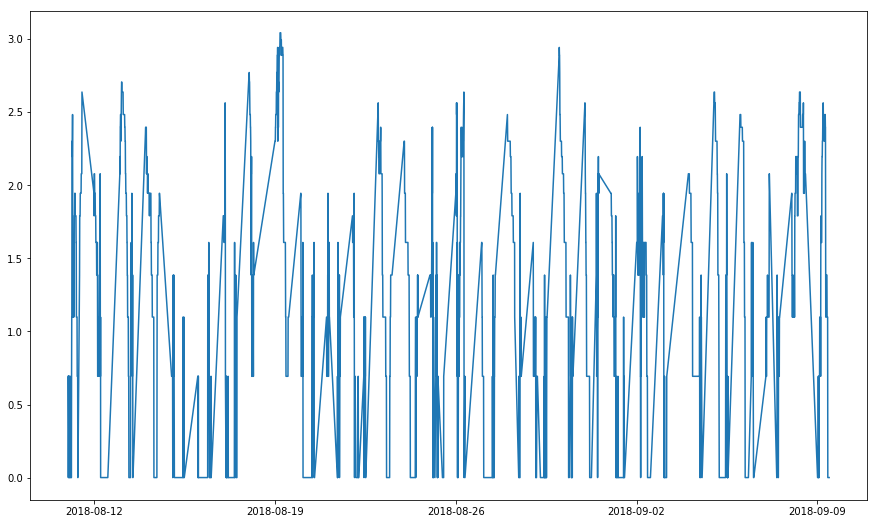

In [444]:
indexedDataset_logScale = np.log(tst_5min)
plt.plot(indexedDataset_logScale)

In [449]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=50).mean()
    movingSTD = timeseries.rolling(window=50).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['no_of_cars'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

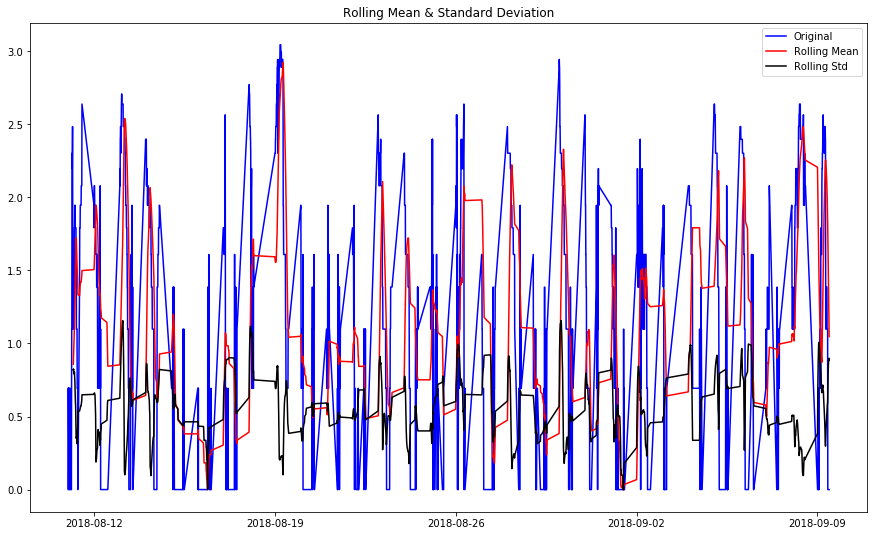

Results of Dickey Fuller Test:
Test Statistic                -7.560373e+00
p-value                        3.021256e-11
#Lags Used                     7.000000e+00
Number of Observations Used    2.988000e+03
Critical Value (1%)           -3.432540e+00
Critical Value (5%)           -2.862508e+00
Critical Value (10%)          -2.567285e+00
dtype: float64


In [450]:
test_stationarity(indexedDataset_logScale)

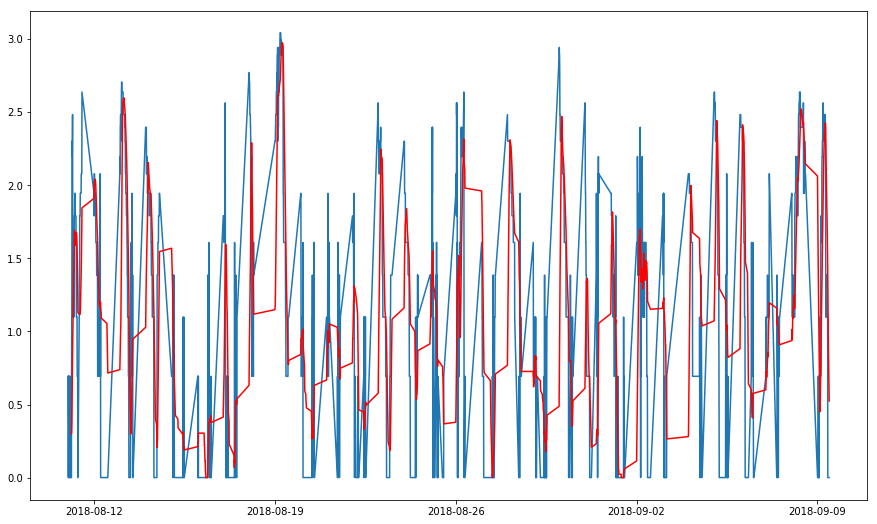

In [453]:
movingAverage = indexedDataset_logScale.rolling(window=30).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [454]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

no_of_cars
start_time                     
2018-08-11 03:10:00    0.392783
2018-08-11 03:15:00    0.392783
2018-08-11 03:20:00    0.761628
2018-08-11 03:25:00    0.748113
2018-08-11 03:30:00    0.734597
2018-08-11 03:35:00    1.646112
2018-08-11 03:40:00    1.599902
2018-08-11 03:45:00    1.746293
2018-08-11 03:50:00    1.567691
2018-08-11 03:55:00    1.517555

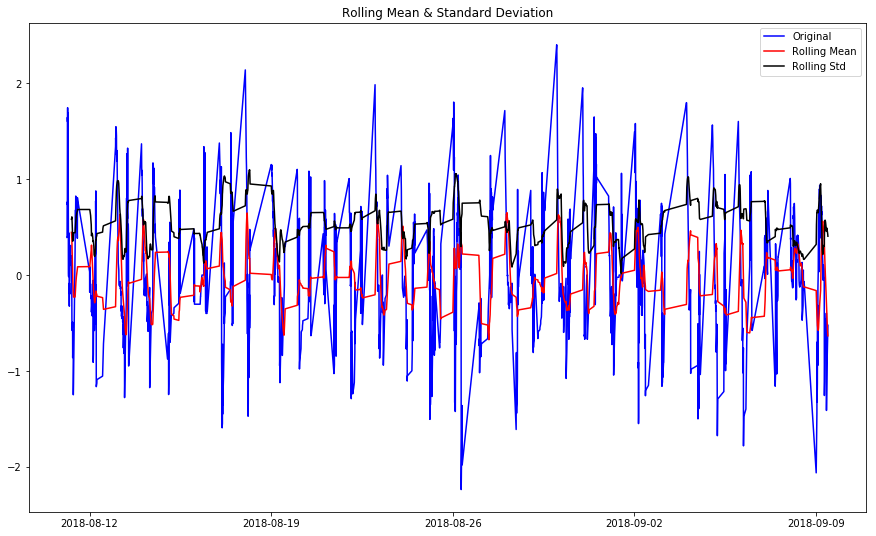

Results of Dickey Fuller Test:
Test Statistic                -1.171324e+01
p-value                        1.471842e-21
#Lags Used                     1.200000e+01
Number of Observations Used    2.954000e+03
Critical Value (1%)           -3.432566e+00
Critical Value (5%)           -2.862519e+00
Critical Value (10%)          -2.567291e+00
dtype: float64


In [455]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [459]:
# indexedDataset_logScale

decomposition = seasonal_decompose(indexedDataset_logScale.index) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Plotting AR model


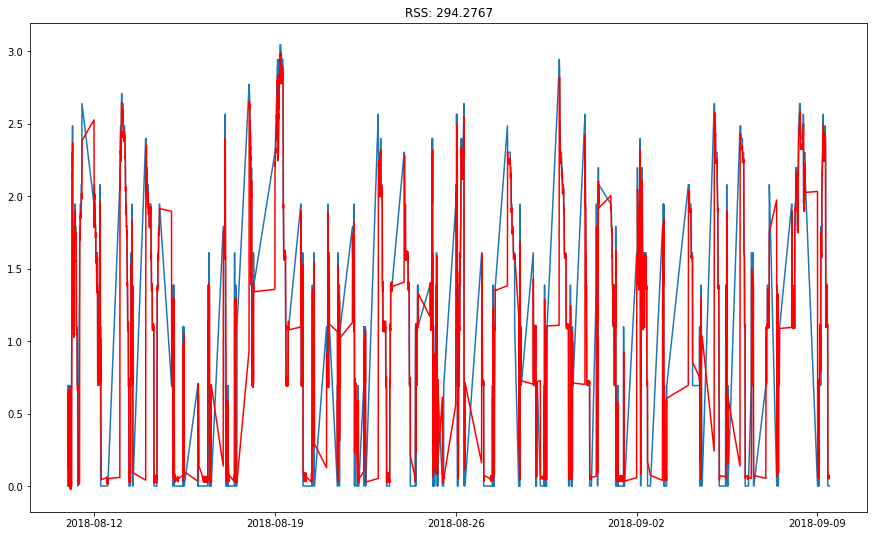

In [538]:
model = ARIMA(indexedDataset_logScale, order=(7,0,1))
results_AR = model.fit(disp=-1)
plt.plot(indexedDataset_logScale)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - indexedDataset_logScale['no_of_cars'])**2))
print('Plotting AR model')

In [539]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

start_time
2018-08-11 00:10:00    0.000000
2018-08-11 00:15:00    0.657722
2018-08-11 00:20:00    0.118815
2018-08-11 00:25:00    0.567143
2018-08-11 00:50:00    0.646923
dtype: float64


In [657]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['no_of_cars'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff, fill_value=0)
predictions_ARIMA_log.tail()

start_time
2018-09-09 10:35:00    0.751022
2018-09-09 10:40:00    0.768959
2018-09-09 10:45:00    0.748145
2018-09-09 10:50:00    0.750444
2018-09-09 10:55:00    0.743754
dtype: float64

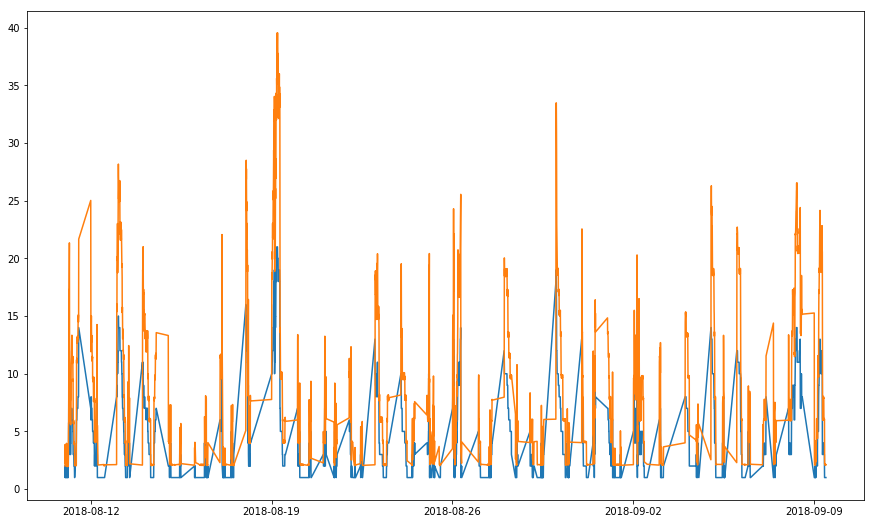

In [541]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tst_5min)
plt.plot(predictions_ARIMA)

In [542]:
predictions_ARIMA

start_time
2018-08-11 00:10:00    2.000000
2018-08-11 00:15:00    3.860780
2018-08-11 00:20:00    2.252323
2018-08-11 00:25:00    3.526444
2018-08-11 00:50:00    3.819312
2018-08-11 00:55:00    2.265138
2018-08-11 01:00:00    3.461695
2018-08-11 01:05:00    2.260618
2018-08-11 01:10:00    2.057169
2018-08-11 01:15:00    3.404776
2018-08-11 01:20:00    3.881205
2018-08-11 01:25:00    3.741810
2018-08-11 01:30:00    3.930450
2018-08-11 01:35:00    3.968908
2018-08-11 01:55:00    2.232453
2018-08-11 02:00:00    2.098209
2018-08-11 02:05:00    1.957488
2018-08-11 02:10:00    2.041255
2018-08-11 02:15:00    2.020795
2018-08-11 02:20:00    1.980590
2018-08-11 02:25:00    2.052502
2018-08-11 02:30:00    1.951406
2018-08-11 02:35:00    2.038869
2018-08-11 02:40:00    2.020059
2018-08-11 02:45:00    3.399839
2018-08-11 02:50:00    3.874576
2018-08-11 02:55:00    3.752556
2018-08-11 03:00:00    2.288718
2018-08-11 03:05:00    2.098065
2018-08-11 03:10:00    1.996354
                         ... 

In [547]:
# c=results_AR.predict(start = 2995, end= 3000, dynamic= True)
# plt.plot(tst_5min)
# plt.plot(c)
results_AR.predict(start = 2995, end= 3000, dynamic= True)

2995    0.050607
2996    0.097168
2997    0.158394
2998    0.193124
2999    0.232378
3000    0.263065
dtype: float64

In [384]:
tst_5min.isna().sum()

start_time    0
no_of_cars    0
dtype: int64

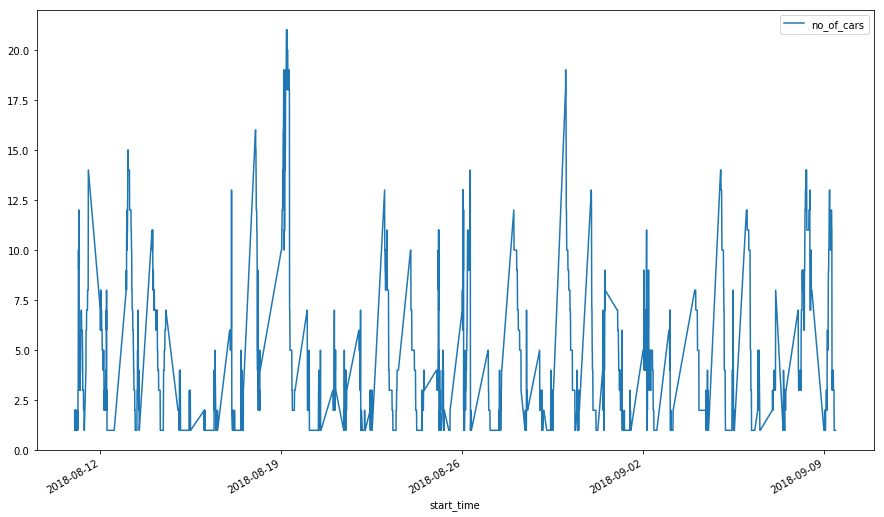

In [392]:
tst_5min.plot(figsize=(15,9))

In [386]:
tst_5min.no_of_cars.max()

21

In [393]:
rolmean = tst_5min.rolling(window=70).mean()
rolstd = tst_5min.rolling(window=70).std()

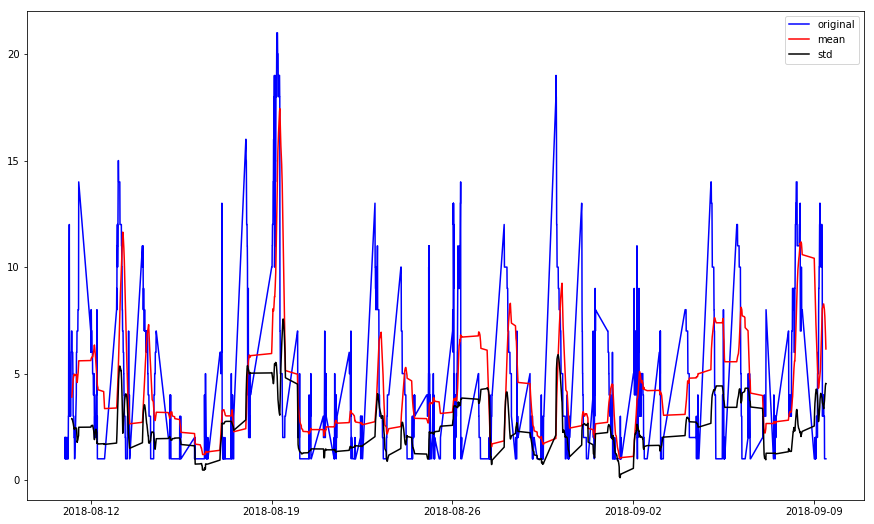

In [243]:
plt.plot(tst_5min,color='blue' ,label='original')
plt.plot(rolmean,color='red',label='mean')
plt.plot(rolstd,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [388]:
from statsmodels.tsa.stattools import adfuller
# series = Series.from_csv('daily-total-female-births.csv', header=0)
# X = series.values
result = adfuller(tst_5min['no_of_cars'],autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.497683
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [244]:
split = len(tst_5min) / 2
X1, X2, X3, X4 = tst_5min[0:749], tst_5min[749:1498],tst_5min[1498:2247],tst_5min[2247:]
mean1, mean2,mean3, mean4 = X1.mean(), X2.mean(),X3.mean(), X4.mean()
var1, var2,var3, var4 = X1.var(), X2.var(),X3.var(), X4.var()
print('mean1=%f, mean2=%f,mean3=%f, mean4=%f' % (mean1, mean2,mean3,mean4))
print('variance1=%f, variance2=%f,variance3=%f, variance4=%f' % (var1, var2,var3,var4))

mean1=4.341789, mean2=5.391188,mean3=4.098798, mean4=5.728972
variance1=12.433826, variance2=25.222436,variance3=12.361884, variance4=14.229922


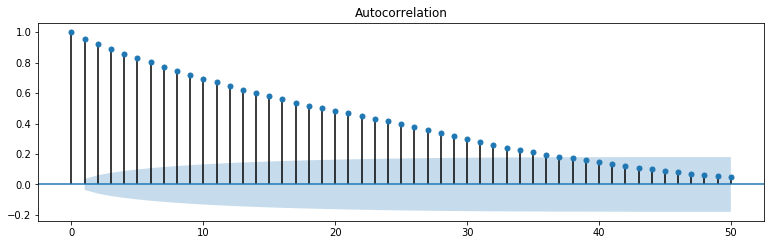

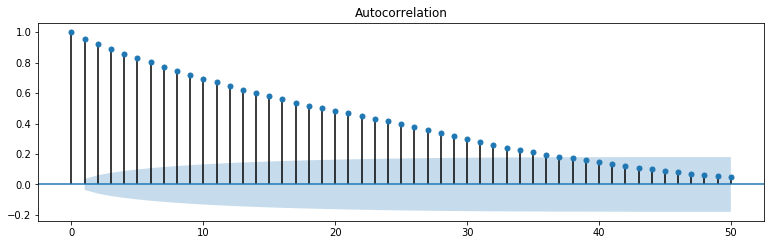

In [249]:
from statsmodels.graphics.tsaplots import plot_acf
fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(211)
plot_acf(tst_5min,lags=50,ax=ax1)

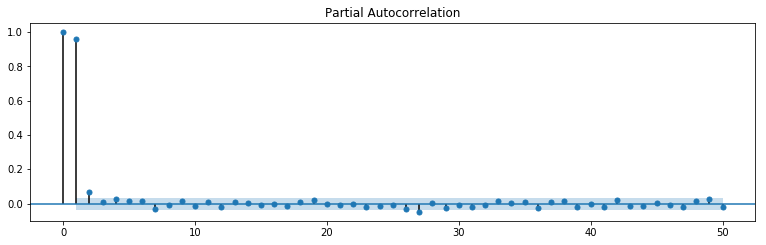

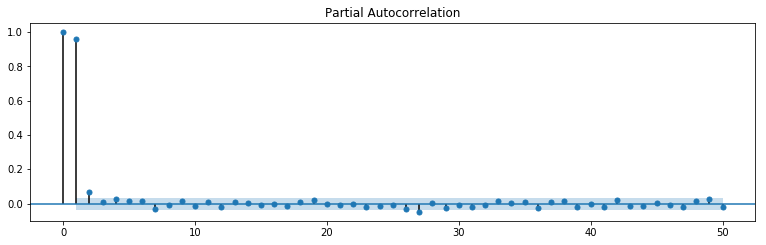

In [394]:
from statsmodels.graphics.tsaplots import plot_pacf
fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(212)
plot_pacf(tst_5min,lags=50,ax=ax1)

In [654]:
import statsmodels.api as sm 
x1=sm.tsa.ARMA(tst_5min,(2,0)).fit(disp=False)
x2=sm.tsa.ARMA(tst_5min,(3,0)).fit(disp=False)
x3=sm.tsa.ARMA(tst_5min,(4,0)).fit(disp=False)
x4=sm.tsa.ARMA(tst_5min,(5,0)).fit(disp=False)
x5=sm.tsa.ARMA(tst_5min,(7,0)).fit(disp=False)
y=sm.tsa.ARMA(tst_5min,(7,0)).fit(disp=False)
z=sm.tsa.ARIMA(tst_5min,(7,1,3)).fit(disp=False)
z1=sm.tsa.ARIMA(tst_5min,(2,1,0)).fit(disp=False)
n = SARIMAX(tst_5min, order=(2,0,0), seasonal_order=(1,1,0,50)).fit(disp=False)
print(x1.aic)
print(x2.aic)
print(x3.aic)
print(x4.aic)
print(x5.aic)
print(y.aic)
print(z.aic)
print(z1.aic)
print(n.aic)
# x1.fittedvalues

9483.241117972415
9485.026064274232
9485.139531963456
9486.168486665965
9487.206285834516
9487.206285834516
9491.882579325847
9531.523729941528
10553.824087418774


In [632]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(tst_5min, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=70,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 70); AIC=9558.848, BIC=9588.753, Fit time=335.170 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 70); AIC=11296.690, BIC=11308.653, Fit time=4.568 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 70); AIC=10542.405, BIC=10566.330, Fit time=63.622 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 70); AIC=9568.878, BIC=9592.802, Fit time=187.385 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 70); AIC=9558.966, BIC=9594.852, Fit time=340.159 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 70); AIC=11247.814, BIC=11271.738, Fit time=23.764 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 70); AIC=9558.870, BIC=9594.756, Fit time=1048.377 seconds


KeyboardInterrupt: 

In [611]:
!pip install pmdarima

    100% |████████████████████████████████| 225kB 3.0MB/s ta 0:00:011
    100% |████████████████████████████████| 2.9MB 9.3MB/s eta 0:00:01
  Found existing installation: Cython 0.28.5
    Uninstalling Cython-0.28.5:
      Successfully uninstalled Cython-0.28.5


[]

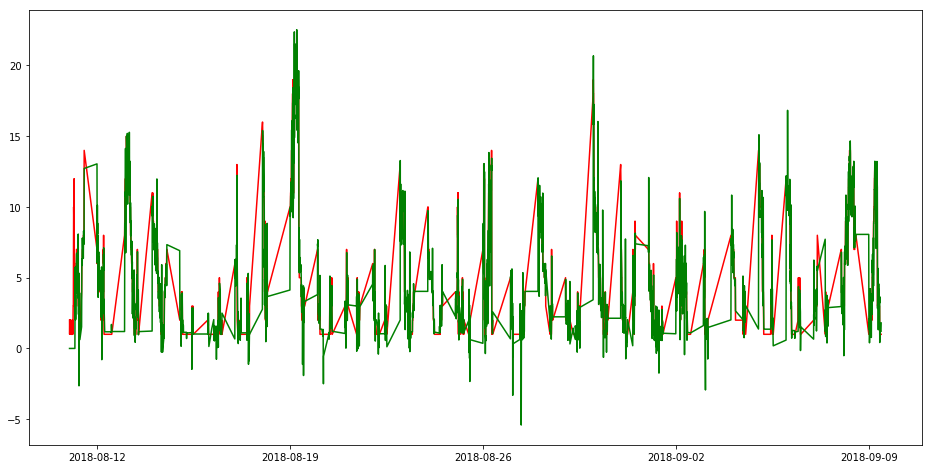

In [655]:
figure = plt.figure(figsize=(16,8))
plt.plot(tst_5min,color='red',label='original')
plt.plot(n.fittedvalues,color='green',label='fitted')
plt.plot()

2980    0.417953
2981    1.145291
2982    0.745435
2983    1.649422
2984    1.262459
2985    1.225456
2986    1.225456
2987    1.225456
2988    1.225456
2989    1.185500
2990    1.220790
2991    1.223870
2992    1.223870
2993    1.223870
2994    1.743849
2995    1.804571
2996    1.305233
2997    1.534739
2998    1.760972
2999    1.978478
3000    1.708000
3001    3.349906
3002    3.024350
3003    3.211626
3004    3.872042
3005    1.445914
3006   -0.426665
3007   -0.265440
3008   -0.110140
3009    0.039452
          ...   
3260    1.328699
3261    1.438653
3262    1.544565
3263    2.607683
3264    2.705953
3265    3.120978
3266    3.212157
3267    3.299985
3268    3.384586
3269    3.786443
3270    3.864939
3271    3.260916
3272    3.333748
3273    3.724269
3274    4.112212
3275    4.177305
3276    4.240006
3277    4.620769
3278    4.678945
3279    3.375716
3280    2.788962
3281    2.840957
3282    2.891041
3283    2.939284
3284    2.985754
3285    3.030516
3286    3.073633
3287    3.1151

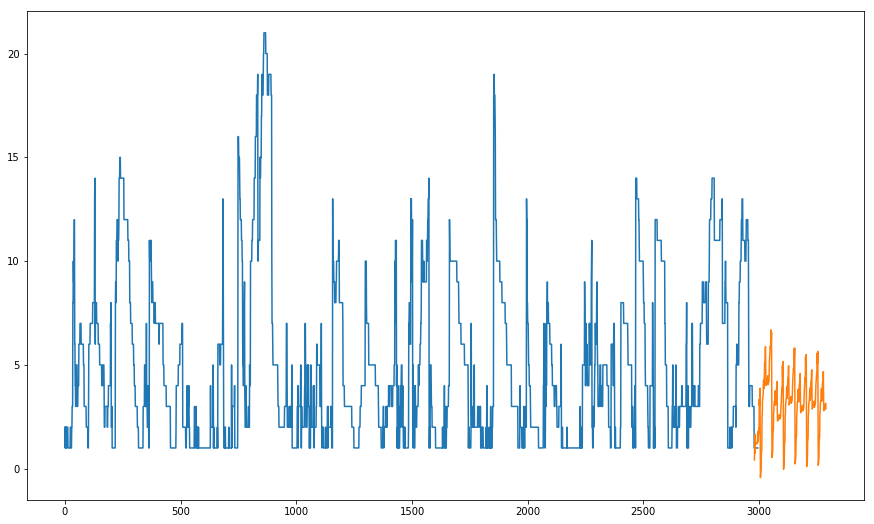

In [656]:
# # print(x1.fittedvalues)
# # print(n.forecast(steps=190)[0])
# c=n.predict(start = 2995, end= 3000, dynamic= True)
# v=n.get_prediction(start = 2995, end= 3100, dynamic= True)
# print(v.predicted_mean)
# v.model.plot()
# # c=results_AR.predict(start = 2995, end= 3000, dynamic= True)
# plt.plot(tst_5min)
# plt.plot(c)
# # tst_5min.info()
# # n.plot_predict(2700,3091)

j = n.predict(2980,3289)
# forecast = pd.DataFrame(forecast,index = tst_5min.index,columns=['Prediction'])
# plt.plot()
plt.plot(tst_5min.values)
plt.plot(j)
j
# 
# plt.plot(tst_5min, label='Valid')
# # plt.plot(forecast, label='Prediction')
# plt.show()

# pred = n.predict(start=2995, end=2997)
# pred.plot()
# #Plot
# plotSARIMAX(tst_5min, pred)

                              ARMA Model Results                              
Dep. Variable:             no_of_cars   No. Observations:                 2996
Model:                     ARMA(2, 0)   Log Likelihood               -4737.621
Method:                       css-mle   S.D. of innovations              1.176
Date:                Sun, 27 Jan 2019   AIC                           9483.241
Time:                        16:17:14   BIC                           9507.261
Sample:                             0   HQIC                          9491.882
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8328      0.530      9.120      0.000       3.794       5.871
ar.L1.no_of_cars     0.8931      0.018     49.004      0.000       0.857       0.929
ar.L2.no_of_cars     0.0667 

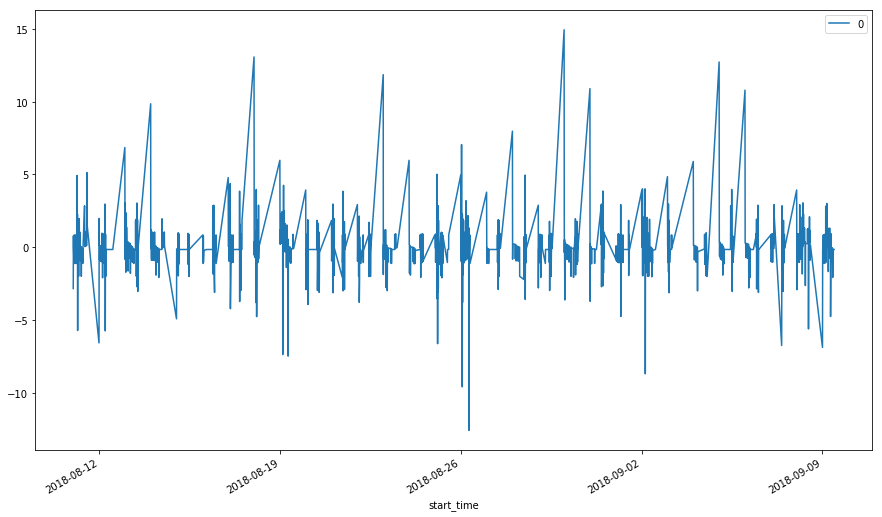

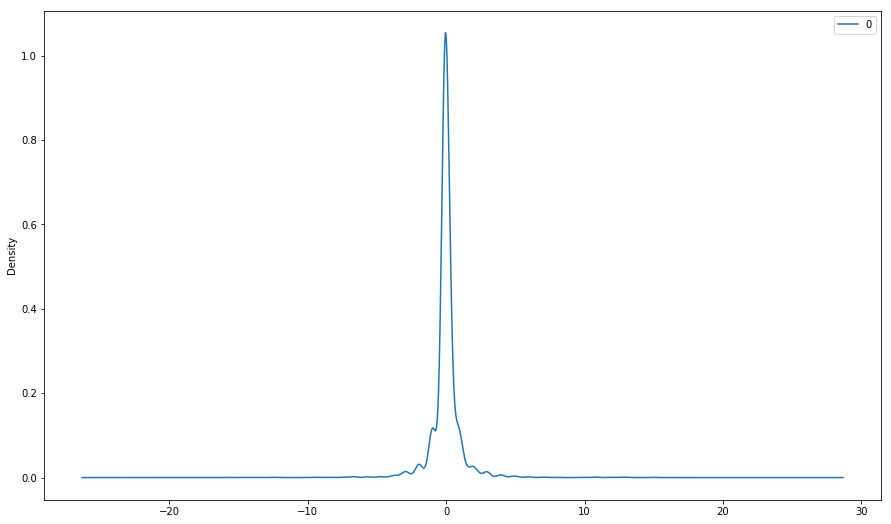

                 0
count  2996.000000
mean      0.001053
std       1.177056
min     -12.564739
25%      -0.154093
50%      -0.073686
75%       0.167534
max      14.926314


In [258]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot


model = ARIMA(tst_5min, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

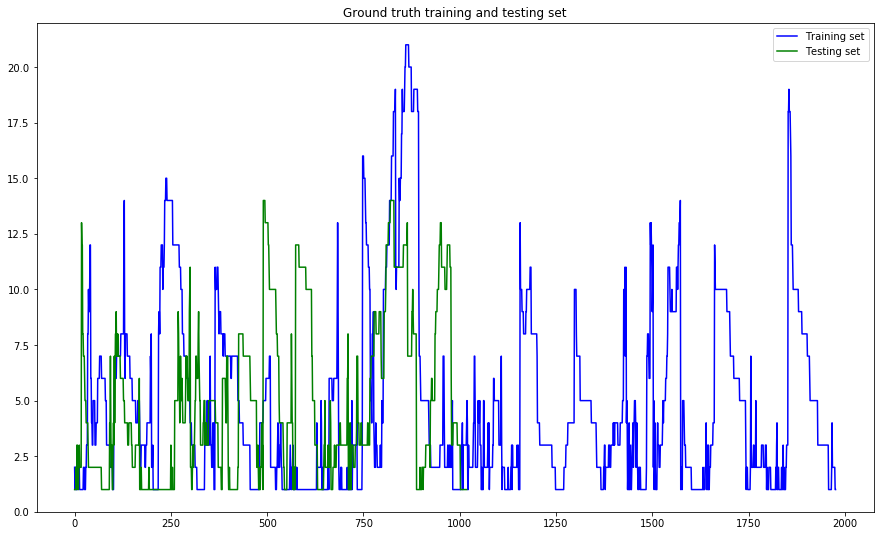

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 1.316


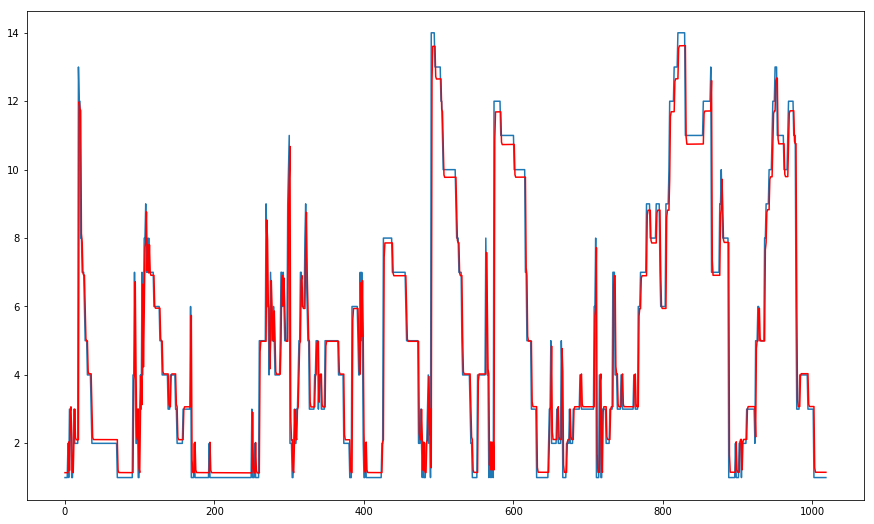

In [443]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = tst_5min.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

plt.plot(train, color='blue', label='Training set')
plt.plot(test, color='green', label='Testing set')
plt.legend()
plt.title('Ground truth training and testing set')
plt.show()



history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
# 	print("output is XXXX",output)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

1.165415386760654
1.3237063818536314
1.4751798307159159
1.6201293630424902
1.7588359619844254


ValueError: x and y must have same first dimension, but have shapes (2996, 1) and (5,)

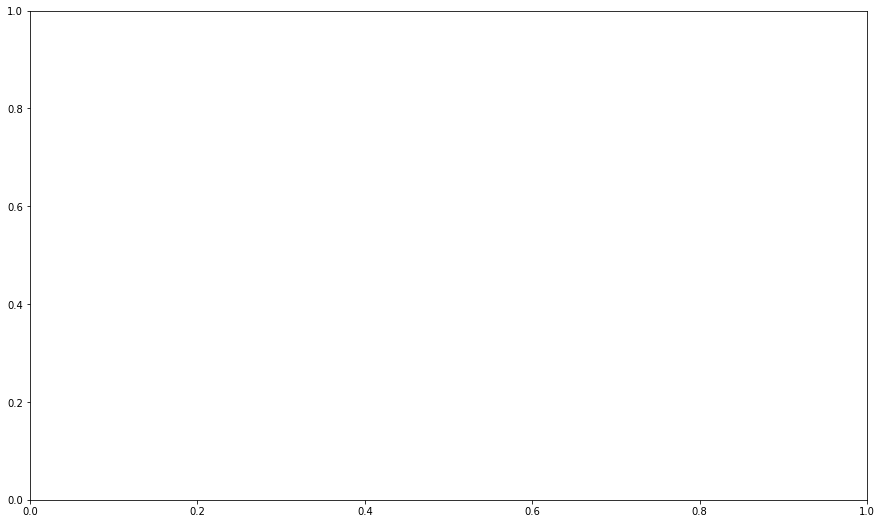

In [441]:
model = ARIMA(tst_5min, order=(1,0,0))
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=5)[0]
# invert the differenced forecast to something usable
for yhat in forecast:
# 	inverted = inverse_difference(history, yhat, days_in_year)
	print(yhat)
    
# plt.plot(tst_5min, model_fit.predict(start=2995 ,end=2999))
plt.plot(tst_5min, forecast.data)
plt.show()

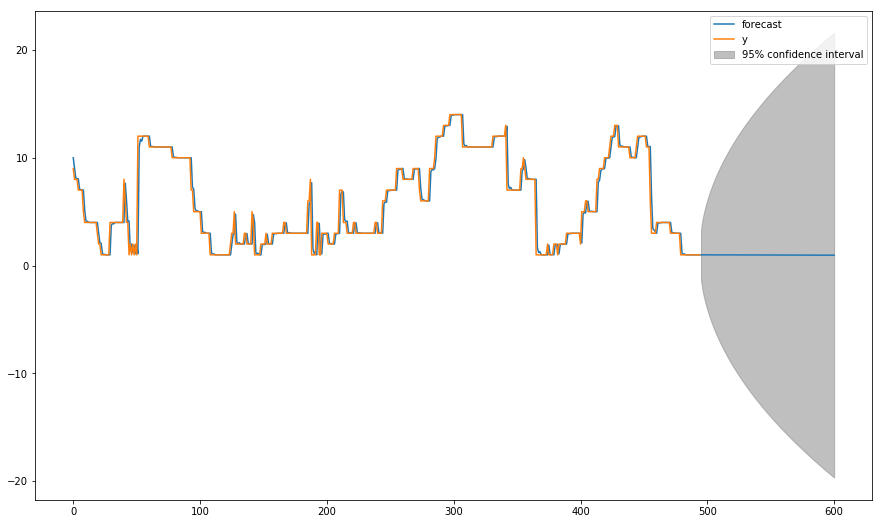

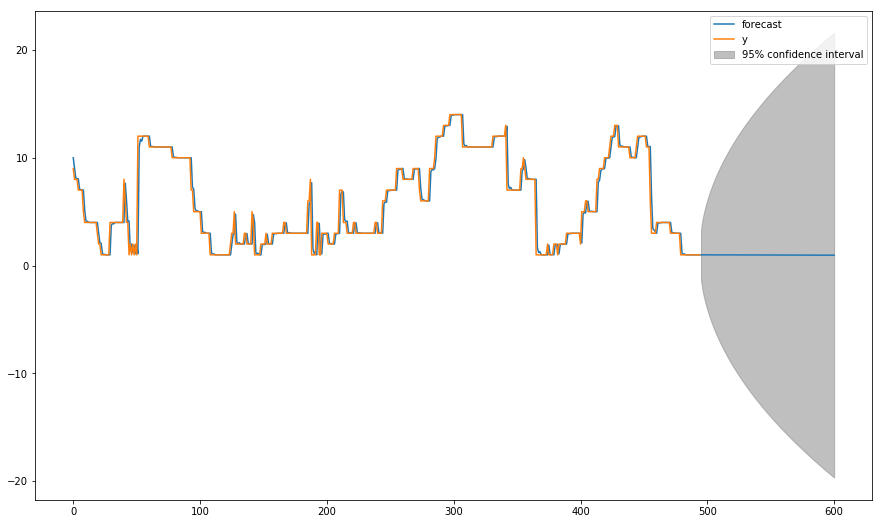

In [330]:
model_fit.plot_predict(2500,3100)

In [339]:
# print(len(history))
# p=model_fit.forecast(10)
# p=p[0]
# p
print('ok',history[-2995])

def inverse_difference(history, yhat, interval=1):
	print('is is',history[-interval])    
	return yhat + history[-interval]
 

forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, 2995)
	print(inverted)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

ok [2]
is is [1]
[1.99964154]
Day 1: 1.999642
is is [2]
[2.99931543]
Day 2: 2.999315
is is [2]
[2.99899736]
Day 3: 2.998997
is is [1]
[1.99869278]
Day 4: 1.998693
is is [2]
[2.99838537]
Day 5: 2.998385
is is [1]
[1.99807746]
Day 6: 1.998077
is is [1]
[1.99776911]
Day 7: 1.997769


In [344]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

differenced = difference(tst_5min.values, 1)
differenced

array([[-1],
       [ 1],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]])

In [268]:
X = tst_5min.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train.shape
history = [x for x in train]
history
for t in range(len(test)):
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [269]:
X = tst_5min.values
train = X[0:700] 
test = X[700:]  
predictions = []
df


uuid       asset_id  \
0       SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...  SENSITY-kc-23   
1       SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...  SENSITY-kc-22   
2       SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...  SENSITY-kc-10   
3       SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...  SENSITY-kc-12   
4       SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1   SENSITY-kc-9   
5       SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...  SENSITY-kc-14   
6       SENSITY-kc-18-B6079A6A-B9EF-4080-B4D8-B2BA7099...  SENSITY-kc-18   
7       SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E   SENSITY-kc-2   
8       SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A37...  SENSITY-kc-12   
9       SENSITY-kc-21-8A06DAEC-A8E9-4996-8723-51570636...  SENSITY-kc-21   
10      SENSITY-kc-21-4A7750BE-5AA9-492D-B913-04ED44E5...  SENSITY-kc-21   
11      SENSITY-kc-8-A0436C6D-91A9-452B-8561-A1F44BF0C381   SENSITY-kc-8   
12      SENSITY-kc-9-04B89F44-D078-4E0D-8395-648BF0D779BB   SENSITY-kc-9   
13      SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1F...  SENSITY-kc-10   
14      SENSITY-kc-8-936405B7-7462-46FD-B10E-09D22F407139   SENSITY-kc-8   
15      SENSITY-kc-8-1FE9FA74-7FC8-4721-BFD9-17A05014900E   SENSITY-kc-8   
16      SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09...  SENSITY-kc-12   
17      SENSITY-kc-14-7B69BC78-1676-4132-A4DB-A0C4874B...  SENSITY-kc-14   
18      SENSITY-kc-12-1A22267D-E0F1-4CBF-99B7-AE3AFA38...  SENSITY-kc-12   
19      SENSITY-kc-14-49219653-B436-4ECF-87B2-CEDE9349...  SENSITY-kc-14   
20      SENSITY-kc-2-8FABCBD4-9024-4C48-9D88-2595443C86E8   SENSITY-kc-2   
21      SENSITY-kc-10-E84971B1-043E-4F45-9AEC-358240DD...  SENSITY-kc-10   
22      SENSITY-kc-9-E23BD89B-8118-4445-9FCC-772DA5DB7E15   SENSITY-kc-9   
23      SENSITY-kc-15-C71272E1-BD6E-4F68-83EB-18873CD7...  SENSITY-kc-15   
24      SENSITY-kc-10-463011E6-0068-464D-96FC-2800CEB4...  SENSITY-kc-10   
25      SENSITY-kc-23-66466105-BEA6-408A-8900-FDA4737C...  SENSITY-kc-23   
26      SENSITY-kc-14-D909FA91-A122-4289-928C-79CE91BC...  SENSITY-kc-14   
27      SENSITY-kc-10-0B3CB4D5-CDE5-4CCC-90B8-B5D802F8...  SENSITY-kc-10   
28      SENSITY-kc-10-DD5A7279-56BC-4771-BB59-DB591329...  SENSITY-kc-10   
29      SENSITY-kc-18-7F80957D-A9CA-407C-80FC-5913F6B6...  SENSITY-kc-18   
...                                                   ...            ...   
162092  SENSITY-kc-2-CEC51669-3B92-4F35-A5D6-BF31697569B7   SENSITY-kc-2   
162093  SENSITY-kc-23-ECFE267D-1302-4343-80AF-26E03730...  SENSITY-kc-23   
162094  SENSITY-kc-10-2F7882A5-C7C0-4AB8-A515-1177B625...  SENSITY-kc-10   
162095  SENSITY-kc-12-8FF5C8FE-B542-49CF-88E9-BC00A01B...  SENSITY-kc-12   
162096  SENSITY-kc-9-138FED19-AE19-412D-95A6-B41D5B6FF4ED   SENSITY-kc-9   
162097  SENSITY-kc-8-6CED1DB5-1AAC-40AB-8ABE-96ABFFA510B3   SENSITY-kc-8   
162098  SENSITY-kc-9-0996161E-466F-4AC2-9A57-8DB5AEFF2BDB   SENSITY-kc-9   
162099  SENSITY-kc-14-737064A2-2697-4950-A0E3-BF3758B4...  SENSITY-kc-14   
162100  SENSITY-kc-9-63608323-DA3F-4C86-A099-D9CAE8950D54   SENSITY-kc-9   
162101  SENSITY-kc-7-1D958CD7-578B-4968-A799-3FA5A34BF6A5   SENSITY-kc-7   
162102  SENSITY-kc-4-040F09B1-9C75-498E-ADFD-EAC1151CCC77   SENSITY-kc-4   
162103  SENSITY-kc-10-0C46FB05-47E0-4F7E-8BAE-B5775E99...  SENSITY-kc-10   
162104  SENSITY-kc-6-E6E0392A-2A48-4BE3-A90D-DBE6D8331609   SENSITY-kc-6   
162105  SENSITY-kc-19-D7613A2C-5EEB-4969-AC6F-3A0C8C0B...  SENSITY-kc-19   
162106  SENSITY-kc-2-B0337686-262D-4A70-933F-B6902018F339   SENSITY-kc-2   
162107  SENSITY-kc-19-43A62096-C768-4751-95B8-2D76E3D7...  SENSITY-kc-19   
162108  SENSITY-kc-6-73B6DF35-EE94-4DBA-8EDF-7E6EF877BA24   SENSITY-kc-6   
162109  SENSITY-kc-8-5CDB74F5-2F37-41E8-81B1-1D8F9DBA6F86   SENSITY-kc-8   
162110  SENSITY-kc-2-550877C2-A6E8-4DF2-89A4-1F53ED51C6DF   SENSITY-kc-2   
162111  SENSITY-kc-15-33E1D598-BCC3-40FC-952C-CCE804AF...  SENSITY-kc-15   
162112  SENSITY-kc-2-5D1781B7-C01A-46C8-A681-214FE9FE2FCE   SENSITY-kc-2   
162114  SENSITY-kc-12-137

In [141]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [147]:
predictions = model_ar_fit.predict(start=699,end=979)
predictions.size

281

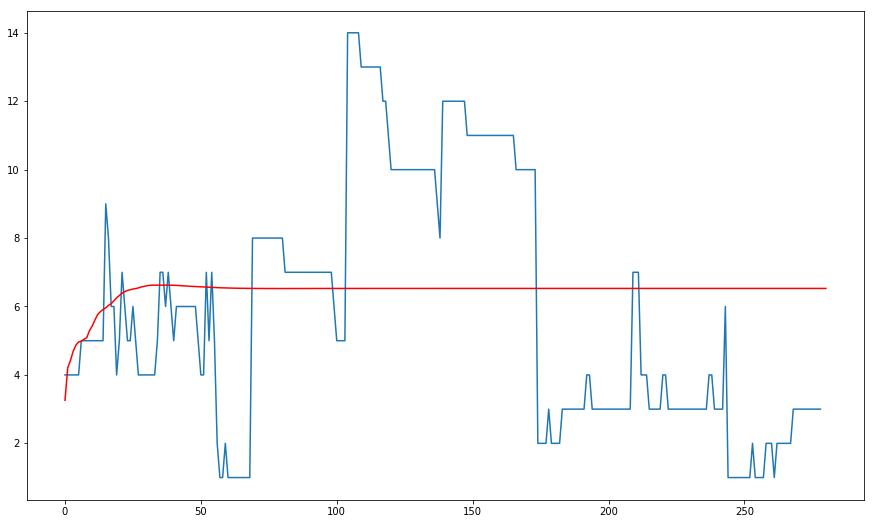

In [148]:
plt.plot(test)
plt.plot(predictions,color='red')

In [139]:
mean_squared_error(tst_5min,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [979, 680]

9205.784815583385


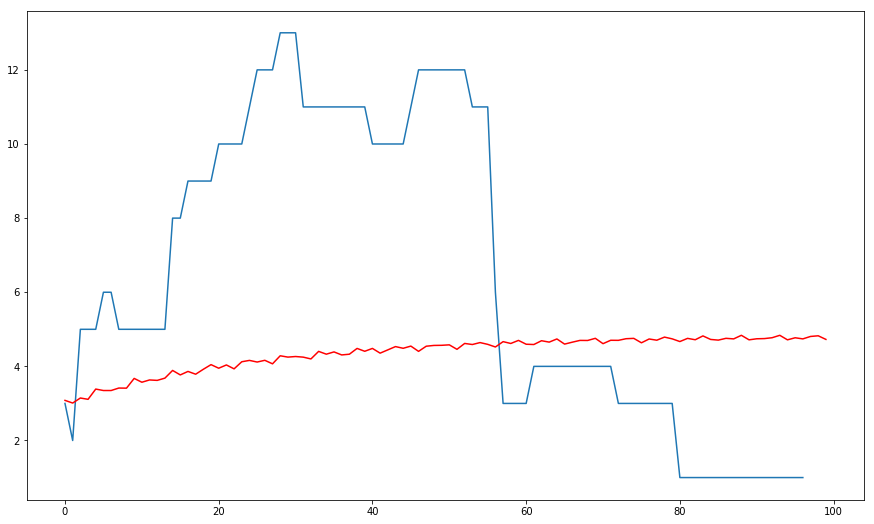

In [107]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(6,0,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
predictions= model_arima_fit.forecast(steps=100)[0]
predictions
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
from statsmodels.tsa.stattools import acf,pacf 
lpacf = pacf(tst_5min,nlags=9,method='ols')
plt.plot(lpacf)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf 
lacf = acf(tst_5min,nlags=85)
plt.plot(lacf)

In [105]:
import itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
pdq
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 15168.316697734357
(0, 0, 1) 12567.954287823235
(0, 0, 2) 11144.058935327766
(0, 0, 3) 10359.726550055351
(0, 0, 4) 9854.486602792744
(0, 0, 5) 9610.677106821367
(0, 0, 6) 9409.099026872373
(0, 0, 7) 9244.40535663807
(0, 1, 0) 8724.576877918264
(0, 1, 1) 8700.687635207976
(0, 1, 2) 8700.108112224872
(0, 1, 3) 8696.071229400835
(0, 1, 4) 8694.743765541456
(0, 1, 5) 8695.52714777075
(0, 1, 6) 8696.861268354418
(0, 1, 7) 8697.970477188888
(0, 2, 0) 10836.44634400714
(0, 2, 1) 8732.233716555915
(1, 0, 0) 8668.675290342822
(1, 0, 1) 8655.779956113205
(1, 0, 2) 8657.54218396425
(1, 0, 3) 8657.44249652953
(1, 0, 4) 8658.606186517278
(1, 0, 5) 8660.553827414347
(1, 0, 6) 8659.58286352861
(1, 0, 7) 8661.58120827042
(1, 1, 0) 8702.227584791568
(1, 1, 1) 8691.373953229899
(1, 2, 0) 9933.595124769268
(1, 2, 1) 8710.068760518729
(1, 2, 6) 8706.855481217654
(1, 2, 7) 8707.68939924912
(2, 0, 0) 8656.085864690354
(2, 0, 1) 8656.880649734983
(2, 1, 0) 8701.84115373287
(2, 1, 1) 8657.221147605

In [173]:
X = tst_5min.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,3))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=5.519438, expected=5.000000
predicted=5.226037, expected=5.000000
predicted=5.384120, expected=4.000000
predicted=4.358377, expected=4.000000
predicted=4.161946, expected=4.000000
predicted=4.061975, expected=4.000000
predicted=4.223136, expected=4.000000
predicted=4.137023, expected=3.000000
predicted=3.037632, expected=2.000000
predicted=2.184766, expected=2.000000
predicted=2.088613, expected=2.000000
predicted=2.023698, expected=2.000000
predicted=2.150086, expected=2.000000
predicted=2.158181, expected=2.000000
predicted=2.116389, expected=2.000000
predicted=2.099457, expected=2.000000
predicted=2.004953, expected=2.000000
predicted=1.983512, expected=2.000000
predicted=2.025529, expected=2.000000
predicted=2.015579, expected=2.000000
predicted=1.984329, expected=2.000000
predicted=1.997003, expected=2.000000
predicted=2.013178, expected=2.000000
predicted=1.999586, expected=2.000000
predicted=1.992253, expected=2.000000
predicted=2.003290, expected=7.000000
predicted=6.

predicted=10.798603, expected=11.000000
predicted=10.695973, expected=11.000000
predicted=10.746096, expected=11.000000
predicted=10.806856, expected=11.000000
predicted=10.708511, expected=11.000000
predicted=10.740413, expected=11.000000
predicted=10.813062, expected=10.000000
predicted=9.794975, expected=10.000000
predicted=9.766455, expected=10.000000
predicted=9.854509, expected=10.000000
predicted=9.837263, expected=10.000000
predicted=9.798523, expected=10.000000
predicted=9.865824, expected=10.000000
predicted=9.820039, expected=10.000000
predicted=9.797503, expected=2.000000
predicted=2.469140, expected=2.000000
predicted=2.083853, expected=2.000000
predicted=2.021169, expected=2.000000
predicted=2.647879, expected=3.000000
predicted=3.321422, expected=2.000000
predicted=2.192595, expected=2.000000
predicted=2.656017, expected=2.000000
predicted=2.185269, expected=2.000000
predicted=1.736729, expected=3.000000
predicted=3.346246, expected=3.000000
predicted=3.369866, expected=

KeyboardInterrupt: 

In [154]:
model = ARIMA(tst_5min, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:           D.no_of_cars   No. Observations:                  978
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1784.199
Method:                       css-mle   S.D. of innovations              1.500
Date:                Sun, 27 Jan 2019   AIC                           3582.397
Time:                        12:28:05   BIC                           3616.596
Sample:                             1   HQIC                          3595.409
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0011      0.039      0.029      0.977      -0.075       0.078
ar.L1.D.no_of_cars    -0.0626      0.032     -1.964      0.050      -0.125      -0.000
ar.L2.D.no_of_cars  

TypeError: 'module' object is not callable

                             ARIMA Model Results                              
Dep. Variable:           D.no_of_cars   No. Observations:                  978
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1782.539
Method:                       css-mle   S.D. of innovations              1.497
Date:                Sun, 27 Jan 2019   AIC                           3583.079
Time:                        13:19:42   BIC                           3627.048
Sample:                             1   HQIC                          3599.808
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0012      0.036      0.033      0.973      -0.070       0.072
ar.L1.D.no_of_cars    -0.0661      0.032     -2.069      0.039      -0.129      -0.003
ar.L2.D.no_of_cars  

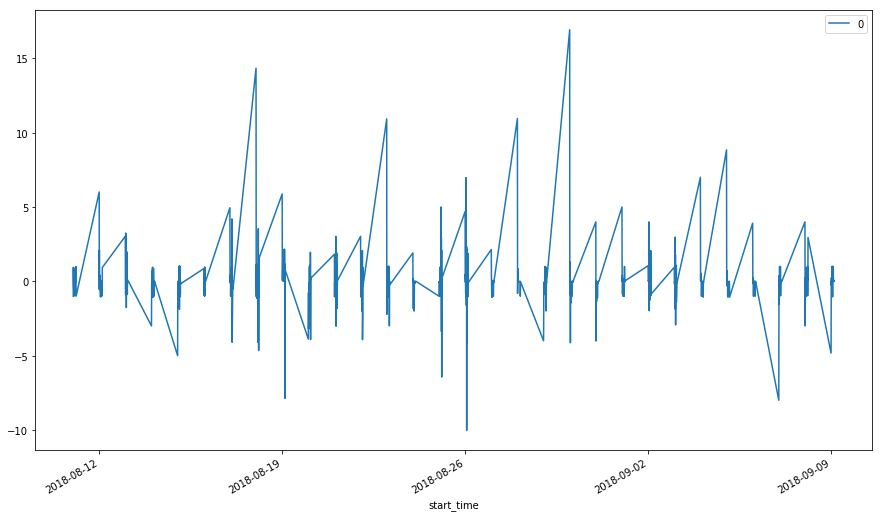

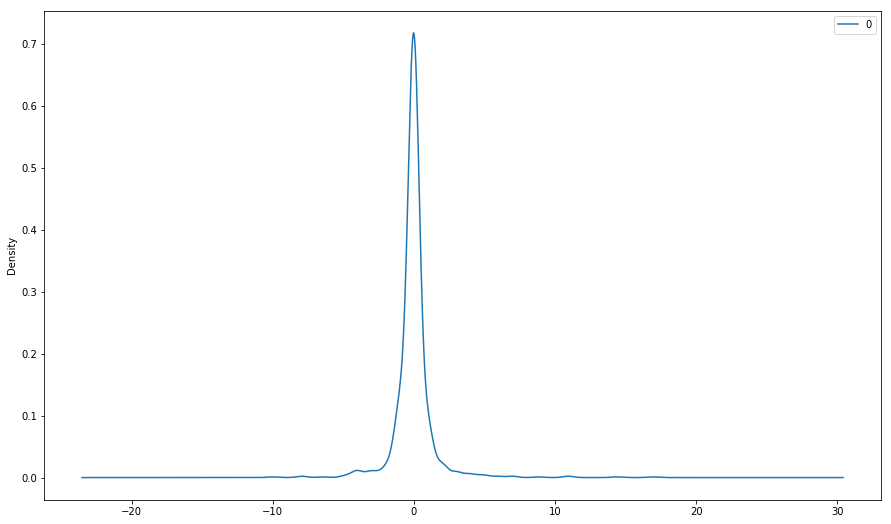

                0
count  978.000000
mean    -0.000206
std      1.498079
min    -10.026063
25%     -0.134444
50%     -0.002448
75%      0.072792
max     16.921389
